# Chapter 8: Estimation

## 1. The estimation game

Let’s play a game. I think of a distribution, and you have to guess what it is. I’ll give you two hints: it’s a normal distribution, and here’s a random sample drawn from it:

In [2]:
import numpy as np

In [3]:
dist1 = [-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

What do you think is the mean parameter, μ, of this distribution?

In [4]:
np.mean(dist1)

0.15516666666666667

One choice is to use the sample mean, x̄, as an estimate of μ. In this example, x̄ is 0.155, so it would be reasonable to guess μ = 0.155. This process is called **estimation**, and the statistic we used (the sample mean) is called an **estimator**.

Using the sample mean to estimate μ is so obvious that it is hard to imagine a reasonable alternative. But suppose we change the game by introducing outliers.

I’m thinking of a distribution. It’s a normal distribution, and here’s a sample that was collected by an unreliable surveyor who occasionally puts the decimal point in the wrong place.

Calculate the sample mean, x̄ of the following distribution:

In [5]:
dist2 = [-0.441, 1.774, -0.101, -1.138, 2.975, -213.8]

Now what’s your estimate of x̄? Is that the best choice? What are the alternatives you can think of?

In [6]:
np.median(dist2)

-0.271

One option is to identify and discard outliers, then compute the sample mean of the rest. 
Another option is to use the median as an estimator.

Which estimator is best depends on the circumstances (for example, whether there are outliers) and on what the goal is. Are you trying to minimize errors, or maximize your chance of getting the right answer?

If there are no outliers, the sample mean minimizes the **mean squared error (MSE)**. That is, if we play the game many times, and each time compute the error x̄ − μ, the sample mean minimizes

![alt text](notebookpics/mse.png "Title")

Where m is the number of times you play the estimation game, not to be confused with n, which is the size of the sample used to compute x̄.

Create a function that calculates the MSE (mean squared error):

In [7]:
def mse(list, m, k=2):
    n = len(list)
    return (1/n)*sum([(x - m)**k for x in list])

Apply it to 1000 random distributions of 7 values with mu = 0 and sigma = 1 for the estimators mean and median:

In [8]:
import random
from sklearn.metrics import mean_squared_error
import os

In [9]:
means = []
medians = []

for i in range(1000):
    distribution = [random.gauss(0, 1) for i in range(7)]
    means.append(np.mean(distribution))
    medians.append(np.median(distribution))
    
mea = mse(means, 0) 
med = mse(medians, 0)

print('mean:', round(mea**0.5, 2))
print('median:', round(med**0.5,2))

mean: 0.38
median: 0.47


Which estimator is better:

In [10]:
# In general (Random), works better than the mean.

Minimizing MSE is a nice property, but it’s not always the best strategy. For example, suppose we are estimating the distribution of wind speeds at a building site. If the estimate is too high, we might overbuild the structure,
increasing its cost. But if it’s too low, the building might collapse. Because cost as a function of error is not symmetric, minimizing MSE is not the best strategy.

As another example, suppose I roll three six-sided dice and ask you to predict the total. If you get it exactly right, you get a prize; otherwise you get nothing. What would estimator would you use?

In [11]:
# mode * 3

In this case the value that minimizes MSE is 10.5, but that would be a bad guess, because the total of three dice is never 10.5. For this game, you want an estimator that has the highest chance of being right, which is a **maximum likelihood estimator (MLE)**. If you pick 10 or 11, your chance of winning is 1 in 8, and that’s the best you can do.

## 2. Guess the variance

I’m thinking of a distribution. It’s a normal distribution, and here’s a (familiar) sample:

In [12]:
dist1 = [-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

What do you think is the variance, σ^2 , of my distribution?

In [13]:
# Answer here
## 3
np.var(dist1)

2.9873351388888882

For large samples, S^2 is an adequate estimator, but for small samples it tends to be too low. Because of this unfortunate property, it is called a **biased estimator**. An estimator is **unbiased** if the expected total (or mean) error, after many iterations of the estimation game, is 0.

Fortunately, there is another simple statistic that is an unbiased estimator of σ^2 :

![alt text](notebookpics/unbiased_var.png "Title")

For an explanation of why S^2 is biased, and a proof that Sn−1 see http://wikipedia.org/wiki/Bias_of_an_estimator .(Homework)

The biggest problem with this estimator is that its name and symbol are used inconsistently. The name “sample variance” can refer to either S^2 or S^2n-1, and the symbol S^2 is used for either or both.

Create a function that calculates S^2n-1:

In [14]:
def varcorr(list):
    return (1/(len(list) - 1))*sum([(x - np.mean(list))**2 for x in list])

compare its MSE to the S^2 on the for 1000 random distributions of 7 values with mu = 0 and sigma = 1:

In [15]:
vars0 = []
vars1 = []

for i in range(1000):
    distribution = [random.gauss(0, 1) for i in range(7)]
    vars0.append(np.var(distribution))
    vars1.append(varcorr(distribution))
    
v0 = mse(vars0, 1, k = 1) 
v1 = mse(vars1, 1, k = 1)

print('S^2:', v0)
print('S^2n-1:', v1)

S^2: -0.12611494660352462
S^2n-1: 0.01953256229588783


Properties like MSE and bias are long-term expectations based on many iterations of the estimation game. By running simulations like the ones in this chapter, we can compare estimators and check whether they have desired properties.

But when you apply an estimator to real data, you just get one estimate. It would not be meaningful to say that the estimate is unbiased; being unbiased is a property of the estimator, not the estimate.

After you choose an estimator with appropriate properties, and use it to generate an estimate, the next step is to characterize the uncertainty of the estimate, which is the topic of the next section.

## 3. Sampling distributions

Suppose you are a scientist studying gorillas in a wildlife preserve. You want to know the average weight of the adult female gorillas in the preserve. To weigh them, you have to tranquilize them, which is dangerous, expensive, and possibly harmful to the gorillas. But if it is important to obtain this information, it might be acceptable to weigh a sample of 9 gorillas. Let’s assume that the population of the preserve is well known, so we can choose a representative sample of adult females. We could use the sample mean, x̄, to estimate the unknown population mean, μ.

Having weighed 9 female gorillas, you might find x̄ = 90 kg and sample standard deviation, S = 7.5 kg. The sample mean is an unbiased estimator of μ, and in the long run it minimizes MSE. So if you report a single estimate that summarizes the results, you would report 90 kg.

But how confident should you be in this estimate? If you only weigh n = 9 gorillas out of a much larger population, you might be unlucky and choose the 9 heaviest gorillas (or the 9 lightest ones) just by chance. Variation in the estimate caused by random selection is called **sampling error**.

To quantify sampling error, we can simulate the sampling process with hypothetical values of μ and σ, and see how much x̄ varies.

Since we don’t know the actual values of μ and σ in the population, we’ll use the estimates x̄ and S. So the question we answer is: “If the actual values of μ and σ were 90 kg and 7.5 kg, and we ran the same experiment many
times, how much would the estimated mean, x̄, vary?”

Run the experiment 1000 times of creating a random distribution of mu=90, sigma=7.5, n=9.  And calculate the means and variances:

In [16]:
means = []
variances = []

for i in range(1000):
    distribution = [random.gauss(90, 7.5) for i in range(9)]
    means.append(np.mean(distribution))
    variances.append(np.var(distribution))

Plot the Cdf of the means distribution. This is called **sampling distribution** of the estimator.

In [17]:
import thinkplot
import thinkstats2
import matplotlib.pyplot as plt
%matplotlib inline

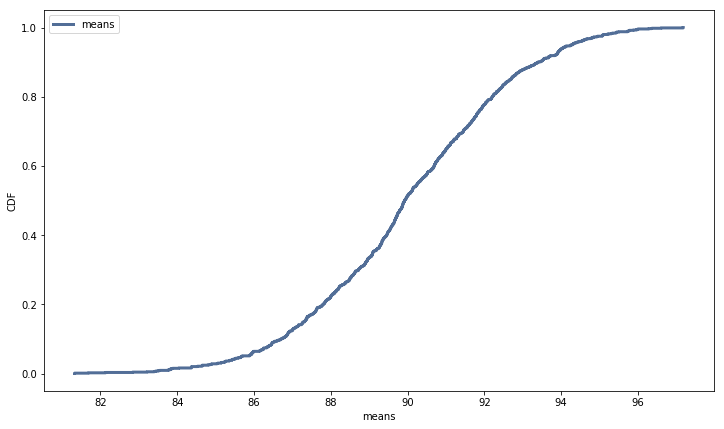

In [18]:
cdf = thinkstats2.Cdf(means, label='means')
plt.figure(figsize = (12,7))
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='means', ylabel='CDF', loc='upper left')

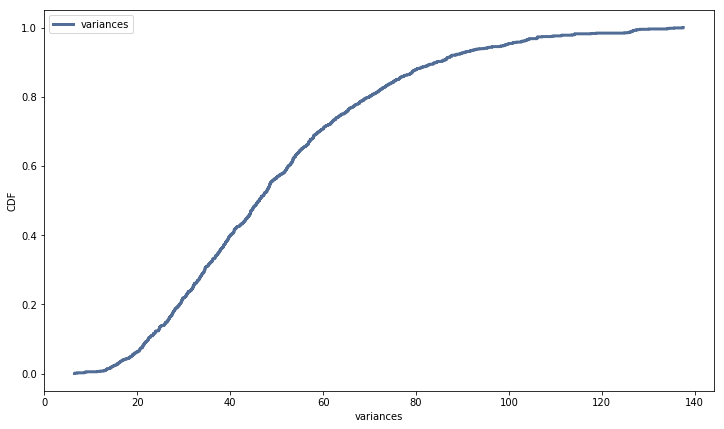

In [34]:
cdf = thinkstats2.Cdf(variances, label='variances')
plt.figure(figsize = (12,7))
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='variances', ylabel='CDF', loc='upper left')

The mean of the sampling distribution is pretty close to the hypothetical value of μ, which means that the experiment yields the right answer, on average. After 1000 tries, the lowest result is 82 kg, and the highest is 98 kg. This range suggests that the estimate might be off by as much as 8 kg.

There are two common ways to summarize the sampling distribution:

- **Standard error (SE)** is a measure of how far we expect the estimate to be off, on average. For each simulated experiment, we compute the error, x̄ − μ, and then compute the root mean squared error (RMSE). In this example, it is roughly 2.5 kg.

- A **confidence interval (CI)** is a range that includes a given fraction of the sampling distribution. For example, the 90% confidence interval is the range from the 5th to the 95th percentile. In this example, the 90% CI is (86, 94) kg.

Repeat the simullations before calculating this two statistics.

In [20]:
v0 = mse(means, 90, k = 2) 

print('Standard error:', v0**0.5)

Standard error: 2.586161697497046


In [21]:
print('Confidence interval (CI):', cdf.Percentile(5),'-',cdf.Percentile(95))

Confidence interval (CI): 18.639437066809293 - 99.24880347927328


Standard errors and confidence intervals are the source of much confusion:

- People often confuse standard error and standard deviation. Remember that standard deviation describes variability in a measured quantity; in this example, the standard deviation of gorilla weight is 7.5 kg. Standard error describes variability in an estimate. In this example, the standard error of the mean, based on a sample of 9 measurements, is 2.5 kg. One way to remember the difference is that, as sample size increases, standard error gets smaller; standard deviation does not.

- People often think that there is a 90% probability that the actual parameter, μ, falls in the 90% confidence interval. Sadly, that is not true. If you want to make a claim like that, you have to use Bayesian methods (see the book, Think Bayes). The sampling distribution answers a different question: it gives you a sense of how reliable an estimate is by telling you how much it would vary if you ran the experiment again.

It is important to remember that confidence intervals and standard errors only quantify sampling error; that is, error due to measuring only part of the population. The sampling distribution does not account for other sources of
error, notably sampling bias and measurement error, which are the topics of the next section.

## 4. Sampling bias

Suppose that instead of the weight of gorillas in a nature preserve, you want to know the average weight of women in the city where you live. It is unlikely that you would be allowed to choose a representative sample of women and
weigh them.

A simple alternative would be “telephone sampling;” that is, you could choose random numbers from the phone book, call and ask to speak to an adult woman, and ask how much she weighs.

Telephone sampling has obvious limitations. For example, the sample is limited to people whose telephone numbers are listed, so it eliminates people without phones (who might be poorer than average) and people with unlisted numbers (who might be richer). Also, if you call home telephones during the day, you are less likely to sample people with jobs. And if you only sample the person who answers the phone, you are less likely to sample people who
share a phone line.

If factors like income, employment, and household size are related to weight and it is plausible that they are—the results of your survey would be affected one way or another. This problem is called **sampling bias** because it is a property of the sampling process.

This sampling process is also vulnerable to self-selection, which is a kind of sampling bias. Some people will refuse to answer the question, and if the tendency to refuse is related to weight, that would affect the results. Finally, if you ask people how much they weigh, rather than weighing them, the results might not be accurate. Even helpful respondents might round up or down if they are uncomfortable with their actual weight. And not all respondents are helpful. These inaccuracies are examples of **measurement error**.

When you report an estimated quantity, it is useful to report standard error, or a confidence interval, or both, in order to quantify sampling error. But it is also important to remember that sampling error is only one source of error, and often it is not the biggest.

## 5 Exponential distributions

Let’s play one more round of the estimation game. I’m thinking of a distriution. It’s an exponential distribution, and here’s a sample:

In [22]:
dist3 = [5.384, 4.493, 19.198, 2.790, 6.122, 12.844]

What do you think is the parameter, λ, of this distribution? (hint: search the mean how the mean value of a exponential distribution is calculated)

In [23]:
l = 1/np.mean(dist3)
l

0.11803820503236212

In general, the mean of an exponential distribution is 1/λ, so working backwards, we might choose L = 1/x̄.

L is an estimator of λ. And not just any estimator; it is also the maximum likelihood estimator ([see](http://wikipedia.org/wiki/Exponential_distribution#Maximum_likelihood)). So if you want to maximize your chance of guessing λ exactly, L is the way to go.

But we know that x̄ is not robust in the presence of outliers, so we expect L to have the same problem.

We can choose an alternative based on the sample median. The median of an exponential distribution is ln(2)/λ, so working backwards again, we can define an estimator

![alt text](notebookpics/lm-estimator.png "Title")

where m is the sample median.

test the performance of this estimators with a simulation of a 1000 sampling process of λ=2 with 7 observations.

In [24]:
mydir = os.getcwd() # would be the same path as a.py
mydir_new = os.chdir(mydir+"/Thinkstats2")
from estimation import RMSE, MeanError

In [25]:
lam = 2
n = 7
l = []
lm = []
for i in range(1000):
    distribution = np.random.exponential(1.0/lam, n)
    l.append(1 / np.mean(distribution))
    lm.append(np.log(2) / np.median(distribution))
    
mea = mse(l, lam, k = 1) 
med = mse(lm, lam, k = 1)

mea1 = MeanError(l, lam) 
med1 = MeanError(lm, lam)

What results do you get?

In [26]:
print('My mean:', round(mea, 2))
print('My median:', round(med,2))
print()
print('mean:', round(mea1, 2))
print('median:', round(med1,2))

My mean: 0.35
My median: 0.43

mean: 0.35
median: 0.43


##  6. Exercises
## 1)
In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased. Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [27]:
means = []
medians = []
for i in range(1000):
    distribution = [np.random.exponential(0.5, 7)]
    means.append(1/np.mean(distribution))
    medians.append(np.log(2)/np.median(distribution))
    
mea = mse(means, 0.5, k = 1) 
med = mse(medians, 0.5, k = 1)

print('mean:', round(mea, 2))
print('median:', round(med,2))

mean: 1.81
median: 1.91


In [28]:
vars0 = []
vars1 = []

for i in range(1000):
    distribution = np.random.exponential(0.5, 7)
    vars0.append(np.var(distribution))
    vars1.append(varcorr(distribution))

# s = lamba^(-2)
v0 = mse(vars0, 0.25, k = 1) 
v1 = mse(vars1, 0.25, k = 1)

print('S^2:', v0)
print('S^2n-1:', v1)

S^2: -0.04094308758346185
S^2n-1: -0.0061002688473722365


## 2)
Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

Standard error: (Medians) 1.173957029190996
Standard error: (Means) 0.8097050751967554

Confidence interval (CI): (Medians) 18.639437066809293 - 99.24880347927328
Confidence interval (CI): (Means) 1.2752572965417588 - 3.604053514233752


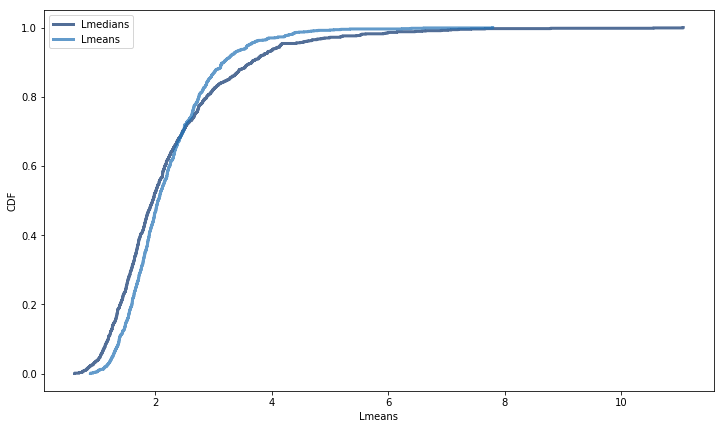

In [29]:
Lmedians = []
Lmeans = []
n = 10
l = 2

for i in range(1000):
    distribution = np.random.exponential(1/l, n)
    Lmedians.append(np.log(2)/np.median(distribution))
    Lmeans.append(1 / np.mean(distribution))
    
cdf0 = thinkstats2.Cdf(Lmedians, label='Lmedians')
plt.figure(figsize = (12,7))
thinkplot.Cdf(cdf0)
thinkplot.Config(xlabel='Lmedians', ylabel='CDF', loc='upper left')

cdf1 = thinkstats2.Cdf(Lmeans, label='Lmeans')
thinkplot.Cdf(cdf1)
thinkplot.Config(xlabel='Lmeans', ylabel='CDF', loc='upper left')

l0 = mse(Lmedians, 2, k = 2)
l1 = mse(Lmeans, 2, k = 2)

print('Standard error: (Medians)', l0**0.5) # RMSE
print('Standard error: (Means)', l1**0.5) # RMSE
print()
print('Confidence interval (CI): (Medians)', cdf.Percentile(5),'-',cdf.Percentile(95))
print('Confidence interval (CI): (Means)', cdf1.Percentile(5),'-',cdf1.Percentile(95))

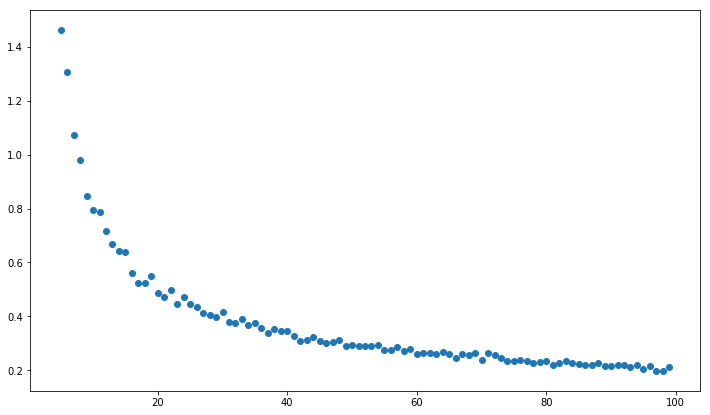

In [30]:
ns = list(range(5, 100))
errors = []
for n in ns:
    Ls = []
    l = 2

    for i in range(1000):
        distribution = np.random.exponential(1/l, n)
        Ls.append(1 / np.mean(distribution))

    errors.append(mse(Ls, l, k = 2)**0.5) 

plt.figure(figsize = (12,7))
plt.scatter(ns, errors)
plt.show()

## 3) 

In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [31]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [32]:
SimulateGame(2)

4

In [33]:
def SimulateGames(games, lam):
    goals = []
    for game in range(games):
        goals.append(SimulateGame(lam))
        Ls.append(1 / np.mean(distribution))
    return goals

l = 2
goals = SimulateGames(10000, l)
rmse = mse(goals, lam, k = 2)**0.5
rmse

1.4215836239912163

###### Javier Fernandez Suarez